# Using BGS World Mineral Statistics - OGCAPI-Features Endpoint

The BGS has recently started serving more data using API's, recognising more users want and need programatic access to data.

BGS is also committed to using international standards, including geospatial standards from the OGC and ISO, which we've done on the API for the World Mineral Statistic Data - utalising the OGC APU - Features standard.

## World mineral statistics data

The British Geological Survey (BGS) and its predecessor organisations have compiled production and trade statistics on a wide range of mineral commodities since 1913.

## Data availability

Currently this tool permits access to data from the World Mineral Statistics archive for the years 1970 to 2023. Prior to 1970 the data are available in PDF files which you can download for free from the main archive page. Selected data from 1960 are also available from the main archive as a static table in MS Excel.

For certain commodities data are not available for all years, for example the BGS commenced collation of data for primary aggregates in 1998 and consequently there are no data for earlier years for this particular commodity. Trade data (imports and exports) are available for all countries up to 2002, and for selected European countries only from 2003 to 2018.


| Year Range     | Import Data | Export Data | Geographic Extent |
|------------    |---------|---------| ----------------- |
| 1970 - 2002    | Yes     | Yes     | All Countries     |
| 1970 - 2018    | Yes     | Yes     | Selected Europe   |
| 1970 - Present | Yes     | Yes     | UK Only           |


## Setup

Installation / Import of required Libaries

In [32]:
!pip install OWSLib
!pip install folium
!pip install geopandas
!pip install pandas
!pip install seaborn

from owslib.ogcapi.features import Features
import requests
import folium
import json
import pandas as pd
import geopandas as gpd

## API Overview

In [8]:
## List all available data collections from the BGS OGC API Service:

bgs = Features('https://ogcapi.bgs.ac.uk/')
bgs.feature_collections()

['scanned-maps-1m',
 'scanned-maps-500k',
 'scanned-maps-250k',
 'bgsgeology625kbedrock',
 'bgsgeology625kdykes',
 'bgsgeology625kfaults',
 'bgsgeology625ksuperficial',
 'aeromag',
 'historicalearthquakes',
 'recentearthquakes',
 'landslideindex',
 'onshoreboreholeindex',
 'agsboreholeindex',
 'geomag-observatory-index',
 'offshore-survey-overview',
 'offshore-factor-map-bsl',
 'offshore-factor-map-qdsl',
 'offshore-factor-map-qdt',
 'offshore-core-sample-data',
 'offshore-sample-activity-data',
 'offshore-sample-geochemical-data',
 'offshore-sample-geological-data',
 'offshore-sample-geotechnical-data',
 'offshore-seabed-sediment-data',
 'offshore-oil-gas-site-surveys',
 'offshorebackscatterareas',
 'offshore-geophysical-survey-lines',
 'offshore-geophysical-survey-shot-points',
 'offshore-geophysical-data-magnetics',
 'offshore-geophysical-data-gravity',
 'offshore-sea-areas',
 'offshore-sea-data-bbox',
 'offshore-sea-doc-event-area',
 'offshore-sea-doc-event-line',
 'offshore-sea-do

In [9]:
## List metadata for a specific collection of data, in this case the BGS World Mineral Statistics

bgs.collection('world-mineral-statistics')

{'id': 'world-mineral-statistics',
 'title': 'BGS World Mineral Statistics',
 'description': 'Welcome to the World Mineral Statistics archive API. The British Geological Survey (BGS) and its predecessor organisations have compiled production and trade statistics on a wide range of mineral commodities since 1913. Currently this tool permits access to data from the World Mineral Statistics archive for the years 1970 to 2022. Prior to 1970 the data are available in PDF files which you can download for free from the main archive page. Selected data from 1960 are also available from the main archive as a static table in MS Excel. For certain commodities data are not available for all years, for example the BGS commenced collation of data for primary aggregates in 1998 and consequently there are no data for earlier years for this particular commodity. Trade data (imports and exports) are available for all countries up to 2002, and for selected European countries only from 2003 to 2018. Pleas

In [10]:
## Return the data for the first 2 items in the collection allowing you to review available properties and formats. This also includes the numberMatched and numberReturned parameters which is usful to understand how much data is available.

minstats = bgs.collection_items('world-mineral-statistics', limit=2)
minstats

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'bgs_statistic_type_trans': 'Production',
    'bgs_commodity_code': 128.0,
    'units': 'kilograms (metal content)',
    'country_trans': 'Burkina Faso',
    'bgs_commodity_trans': 'silver, mine',
    'concat_table_notes_code': None,
    'country_iso2_code': 'BF',
    'bgs_sub_commodity_trans': None,
    'concat_table_notes_text': None,
    'country_iso3_code': 'BFA',
    'erml_group': 'Silver',
    'concat_figure_notes_code': None,
    'year': '2006-01-01',
    'pole_of_inaccessibility_longitude': -0.901057,
    'erml_commodity': 'Silver (mine production, metal content)',
    'concat_figure_notes_text': None,
    'pole_of_inaccessibility_latitude': 12.591396,
    'erml_sub_commodity': 'Ores and concentrates (metal content)',
    'yearbook_table_id': 128,
    'cgi_commodity_url': 'http://resource.geosciml.org/classifier/cgi/commodity-code/silver',
    'yearbook_table_trans': 'Mine production of silver',
 

# Commodities Available

There is a commodities endpoint to get a list of commodities available to search by:

In [38]:
params = {'f': 'json', 'limit': 2000}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics-commodities/items', params=params)
data = response.json()
data
commodities = []
commodities.append(gpd.GeoDataFrame.from_features(data['features']))
commodities = pd.concat(commodities)

# Print the total count of commodities
print(f"Total number of commodities: {len(commodities)}")

# Print the first 10 lines (head) of the commodities GeoDataFrame
print("\nFirst 10 commodities:")
print(commodities.head(10))


Total number of commodities: 111

First 10 commodities:
      geometry      commodity_list_trans  sort_id  commodity_code
0  POINT (0 0)       aggregates, primary      1.0           177.0
1  POINT (0 0)                   alumina      2.0             2.0
2  POINT (0 0)        aluminium, primary      3.0             3.0
3  POINT (0 0)                  antimony      4.0             8.0
4  POINT (0 0)            antimony, mine      5.0             6.0
5  POINT (0 0)                   arsenic      6.0            11.0
6  POINT (0 0)            arsenic, white      7.0             9.0
7  POINT (0 0)                  asbestos      8.0            12.0
8  POINT (0 0)  asbestos, unmanufactured      9.0            14.0
9  POINT (0 0)                   barytes     10.0            17.0


# Gold Production in Australia

In this section we're going to request the Gold production data for Australia and plot this on a chart.

In [13]:
import geopandas as gpd
import pandas as pd
import branca.colormap as cm
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

In [14]:
## Build the request for Australian Gold Production

params = {'f': 'json', 'limit': 60, 'filter': 'erml_group = "Gold" AND country_iso3_code = "AUS" AND bgs_statistic_type_trans = "Production"'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data
## Add this data to a dataframe
gold_aus = []
gold_aus.append(gpd.GeoDataFrame.from_features(data['features']))
gold_aus = pd.concat(gold_aus)
gold_aus.drop(['geometry', 'bgs_commodity_code', 'concat_table_notes_code', 'concat_table_notes_text', 'concat_figure_notes_code', 'bgs_sub_commodity_trans'], axis=1, inplace=True)
gold_aus.head()

,country_iso3_code,erml_commodity,concat_figure_notes_text,pole_of_inaccessibility_longitude,erml_sub_commodity,pole_of_inaccessibility_latitude,cgi_commodity_url,yearbook_table_id,quantity,yearbook_table_trans,units,bgs_statistic_type_trans,bgs_commodity_trans,country_trans,year,country_iso2_code,erml_group
0,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),-23.137734,http://resource.geosciml.org/classifier/cgi/co...,57,19282.0,Mine production of gold,kilograms,Production,"gold, mine",Australia,1970-01-01,AU,Gold
1,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),-23.137734,http://resource.geosciml.org/classifier/cgi/co...,57,20918.0,Mine production of gold,kilograms,Production,"gold, mine",Australia,1971-01-01,AU,Gold
2,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),-23.137734,http://resource.geosciml.org/classifier/cgi/co...,57,23361.0,Mine production of gold,kilograms,Production,"gold, mine",Australia,1972-01-01,AU,Gold
3,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),-23.137734,http://resource.geosciml.org/classifier/cgi/co...,57,17174.0,Mine production of gold,kilograms,Production,"gold, mine",Australia,1973-01-01,AU,Gold
4,AUS,"Gold (mine production, metal production)",None,132.721356,Ores and concentrates (metal content),-23.137734,http://resource.geosciml.org/classifier/cgi/co...,57,15944.0,Mine production of gold,kilograms,Production,"gold, mine",Australia,1974-01-01,AU,Gold


In [16]:
total_production = gold_aus.groupby("year")["quantity"].sum()
total_production.index = pd.to_datetime(total_production.index, format="%Y-%m-%d")

# Convert the index to a Series
total_production.index = pd.Series(total_production.index)

# Apply strftime() to the Series
total_production.index = total_production.index.strftime("%Y")

print(total_production.head(10))

year
1970    19282.0
1971    20918.0
1972    23361.0
1973    17174.0
1974    15944.0
1975    16386.0
1976    15637.0
1977    19417.0
1978    20142.0
1979    18566.0
Name: quantity, dtype: float64


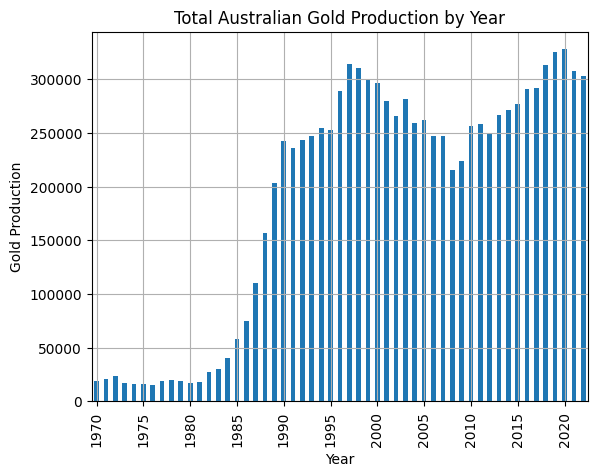

In [ ]:
# Plot the quantity on a chart with year as the x axis

import matplotlib.ticker as mticker

total_production.plot.bar(title="Total Australian Gold Production by Year", grid=True)
plt.xlabel("Year")
plt.ylabel("Gold Production")
# Set x-axis ticks to every 5th year using a MultipleLocator
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.show()


# Global Brown Coal Production

In this section we're going to request all production data for Brown Coal, combine the values for each country to get a total annual production and plot this on a chart.

In [21]:
params = {'f': 'json', 'limit': 13000, 'sortby': '-year', 'filter': 'bgs_commodity_trans = "coal" AND bgs_sub_commodity_trans = "Brown coal" AND bgs_statistic_type_trans = "Production"'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
coal_world = []
coal_world.append(gpd.GeoDataFrame.from_features(data['features']))
coal_world = pd.concat(coal_world)
coal_world.head(10)

,geometry,yearbook_table_id,quantity,yearbook_table_trans,bgs_commodity_code,units,bgs_statistic_type_trans,bgs_commodity_trans,concat_table_notes_code,country_trans,...,erml_group,concat_figure_notes_code,country_iso3_code,erml_commodity,concat_figure_notes_text,year,pole_of_inaccessibility_longitude,erml_sub_commodity,pole_of_inaccessibility_latitude,cgi_commodity_url
0,POINT (132.72136 -23.13773),33,39126000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Australia,...,None,j,AUS,None,Years ended 30 June of that stated.,2022-01-01,132.721356,None,-23.137734,None
1,POINT (9.66988 51.08851),33,130801111.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Germany,...,None,None,DEU,None,None,2022-01-01,9.669879,None,51.088510,None
2,POINT (20.33587 47.15529),33,51844.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Hungary,...,None,None,HUN,None,None,2022-01-01,20.335869,None,47.155288,None
3,POINT (21.06912 43.76936),33,233000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Serbia,...,None,None,SRB,None,None,2022-01-01,21.069123,None,43.769359,None
4,POINT (23.84019 42.73327),33,720000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Bulgaria,...,None,None,BGR,None,None,2022-01-01,23.840188,None,42.733269,None
5,POINT (19.2385 42.78582),33,0.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Montenegro,...,None,None,MNE,None,None,2022-01-01,19.238500,None,42.785818,None
6,POINT (19.48038 48.70494),33,725000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Slovakia,...,None,None,SVK,None,None,2022-01-01,19.480382,None,48.704935,None
7,POINT (16 50),33,33398000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Czech Republic,...,None,None,CZE,None,None,2022-01-01,16.000000,None,50.000000,None
8,POINT (16 50),33,29505000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Czech Republic,...,None,None,CZE,None,None,2021-01-01,16.000000,None,50.000000,None
9,POINT (19.48038 48.70494),33,858000.0,Production of coal,35.0,tonnes (metric),Production,coal,None,Slovakia,...,None,None,SVK,None,None,2021-01-01,19.480382,None,48.704935,None


In [22]:
total_production = coal_world.groupby("year")["quantity"].sum()
total_production.index = pd.to_datetime(total_production.index, format="%Y-%m-%d")

# Convert the index to a Series
total_production.index = pd.Series(total_production.index)

# Apply strftime() to the Series
total_production.index = total_production.index.strftime("%Y")

print(total_production.head(10))

year
1970    534989726.0
1971    535796390.0
1972    529238820.0
1973    528068225.0
1974    541765350.0
1975    537284000.0
1976    562962000.0
1977    561359014.0
1978    548933627.0
1979    575218758.0
Name: quantity, dtype: float64


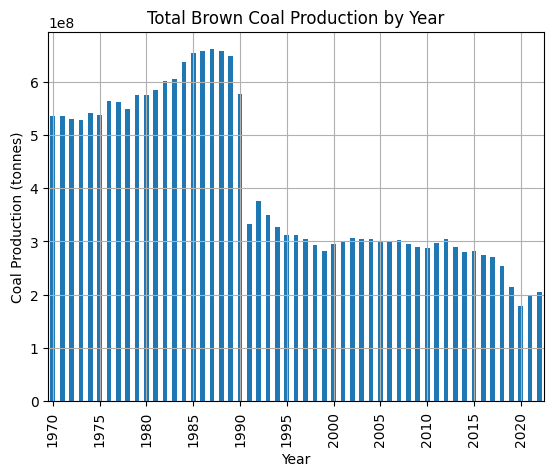

In [23]:
import matplotlib.ticker as mticker

total_production.plot.bar(title="Total Brown Coal Production by Year", grid=True)
plt.xlabel("Year")
plt.ylabel("Coal Production (tonnes)")
# Set x-axis ticks to every 5th year using a MultipleLocator
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.show()

# Global Lithium Minerals Production

In [24]:
params = {'f': 'json', 'limit': 13000, 'sortby': '-year', 'filter': 'bgs_commodity_trans = "lithium minerals" AND bgs_statistic_type_trans = "Production"'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data
## Add this data to a dataframe
lith_data = []
lith_data.append(gpd.GeoDataFrame.from_features(data['features']))
lith_data = pd.concat(lith_data)
lith_data.drop(['geometry', 'bgs_commodity_code'], axis=1, inplace=True)
lith_data.head(10)

,country_iso2_code,bgs_sub_commodity_trans,concat_table_notes_text,country_iso3_code,erml_group,concat_figure_notes_code,year,pole_of_inaccessibility_longitude,erml_commodity,concat_figure_notes_text,...,erml_sub_commodity,yearbook_table_id,cgi_commodity_url,yearbook_table_trans,quantity,bgs_statistic_type_trans,bgs_commodity_trans,units,country_trans,concat_table_notes_code
0,AR,Carbonate,None,ARG,Lithium,*,2022-01-01,-64.247496,Lithium,Estimates.,...,Carbonate,84,http://resource.geosciml.org/classifier/cgi/co...,Production of lithium minerals,50000.0,Production,lithium minerals,tonnes (metric),Argentina,None
1,ZW,Lithium minerals (Li content),None,ZWE,None,None,2022-01-01,29.851884,None,None,...,None,84,None,Production of lithium minerals,1642.0,Production,lithium minerals,tonnes (metric),Zimbabwe,None
2,CN,Lithium minerals (Li content),None,CHN,None,*,2022-01-01,109.537431,None,Estimates.,...,None,84,None,Production of lithium minerals,14000.0,Production,lithium minerals,tonnes (metric),China,None
3,CA,Lithium minerals (Li content),None,CAN,None,None,2022-01-01,-119.677633,None,None,...,None,84,None,Production of lithium minerals,0.0,Production,lithium minerals,tonnes (metric),Canada,None
4,US,Lithium minerals (Li content),None,USA,None,*|c,2022-01-01,-97.834383,None,Estimates.|Carbonate.,...,None,84,None,Production of lithium minerals,2440.0,Production,lithium minerals,tonnes (metric),USA,None
5,BR,Lithium minerals (Li content),None,BRA,None,None,2022-01-01,-49.028010,None,None,...,None,84,None,Production of lithium minerals,3652.0,Production,lithium minerals,tonnes (metric),Brazil,None
6,NA,Lithium minerals (Li content),None,NAM,None,None,2022-01-01,16.971257,None,None,...,None,84,None,Production of lithium minerals,951.0,Production,lithium minerals,tonnes (metric),Namibia,None
7,BO,Carbonate,None,BOL,Lithium,None,2022-01-01,-64.684753,Lithium,None,...,Carbonate,84,http://resource.geosciml.org/classifier/cgi/co...,Production of lithium minerals,617.0,Production,lithium minerals,tonnes (metric),Bolivia,None
8,AU,Lithium minerals (Li content),None,AUS,None,None,2022-01-01,132.721356,None,None,...,None,84,None,Production of lithium minerals,74716.0,Production,lithium minerals,tonnes (metric),Australia,None
9,CL,Carbonate,None,CHL,Lithium,None,2022-01-01,-69.731919,Lithium,None,...,Carbonate,84,http://resource.geosciml.org/classifier/cgi/co...,Production of lithium minerals,201950.0,Production,lithium minerals,tonnes (metric),Chile,None


In [26]:
# Group by both 'year' and 'country' and sum the 'quantity'
grouped_data = lith_data.groupby(["year", "country_trans"])["quantity"].sum()

# Reset the index to have 'year' and 'country' as columns
grouped_data = grouped_data.reset_index()

# Rename the 'level_2' column to 'country' (if needed)
grouped_data = grouped_data.rename(columns={"level_2": "country"})

# Assuming 'year' is a string column
grouped_data["year"] = pd.to_datetime(grouped_data["year"], format="%Y-%m-%d")

# Extract the year in YYYY format
grouped_data["year"] = grouped_data["year"].dt.strftime("%Y")

print(grouped_data.head(10))

   year country_trans  quantity
0  1974     Argentina     164.0
1  1974        Brazil    5400.0
2  1974         China    9000.0
3  1974       Namibia   37762.0
4  1974      Portugal    1200.0
5  1974      Rhodesia    3600.0
6  1974        Rwanda      30.0
7  1974  Soviet Union   45000.0
8  1974           USA    3500.0
9  1975     Argentina     487.0


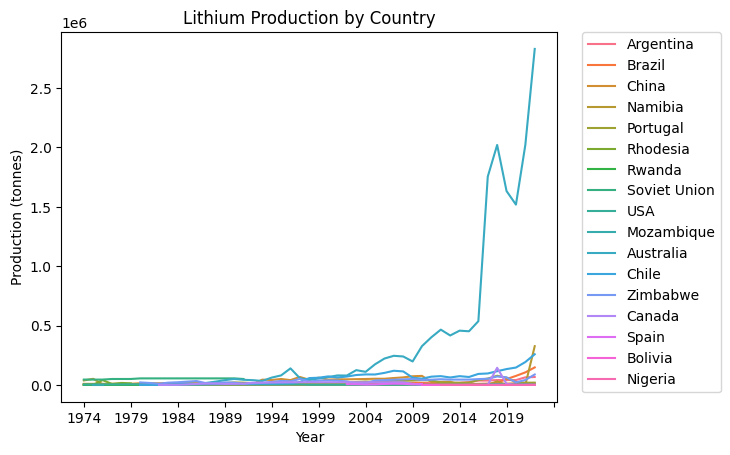

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot
sns.lineplot(x="year", y="quantity", hue="country_trans", data=grouped_data)

plt.title("Lithium Production by Country")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.legend(title="Country")
# Place legend outside the chart on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Set x-axis ticks to every 5th year
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

# Lithium Imports After 2010

In [34]:
params = {'f': 'json', 'limit': 13000, 'sortby': '-year', 'filter': 'bgs_commodity_trans = "lithium" AND bgs_statistic_type_trans = "Imports" AND year AFTER 2010-01-01T00:00:00Z'}
response = requests.get('https://ogcapi.bgs.ac.uk/collections/world-mineral-statistics/items', params=params)
data = response.json()
data
## Add this data to a dataframe
lith_data = []
lith_data.append(gpd.GeoDataFrame.from_features(data['features']))
lith_data = pd.concat(lith_data)
lith_data.drop(['geometry', 'bgs_commodity_code'], axis=1, inplace=True)
lith_data.head(10)

,yearbook_table_id,quantity,yearbook_table_trans,units,bgs_statistic_type_trans,bgs_commodity_trans,concat_table_notes_code,country_trans,bgs_sub_commodity_trans,concat_table_notes_text,...,erml_group,concat_figure_notes_code,country_iso3_code,erml_commodity,concat_figure_notes_text,year,pole_of_inaccessibility_longitude,erml_sub_commodity,pole_of_inaccessibility_latitude,cgi_commodity_url
0,86,2883.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Carbonate,None,...,Lithium,None,GBR,Lithium,None,2022-01-01,-3.000000,Carbonate,55.000000,http://resource.geosciml.org/classifier/cgi/co...
1,86,1069.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Oxides,None,...,Lithium,None,GBR,Lithium,None,2022-01-01,-3.000000,Oxides,55.000000,http://resource.geosciml.org/classifier/cgi/co...
2,86,698.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Oxides,None,...,Lithium,None,GBR,Lithium,None,2021-01-01,-3.000000,Oxides,55.000000,http://resource.geosciml.org/classifier/cgi/co...
3,86,2019.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Carbonate,None,...,Lithium,None,GBR,Lithium,None,2021-01-01,-3.000000,Carbonate,55.000000,http://resource.geosciml.org/classifier/cgi/co...
4,86,1508.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Carbonate,None,...,Lithium,None,GBR,Lithium,None,2020-01-01,-3.000000,Carbonate,55.000000,http://resource.geosciml.org/classifier/cgi/co...
5,86,467.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Oxides,None,...,Lithium,None,GBR,Lithium,None,2020-01-01,-3.000000,Oxides,55.000000,http://resource.geosciml.org/classifier/cgi/co...
6,86,1648.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Carbonate,None,...,Lithium,None,GBR,Lithium,None,2019-01-01,-3.000000,Carbonate,55.000000,http://resource.geosciml.org/classifier/cgi/co...
7,86,552.0,Imports of lithium,tonnes (metric),Imports,lithium,None,United Kingdom,Oxides,None,...,Lithium,None,GBR,Lithium,None,2019-01-01,-3.000000,Oxides,55.000000,http://resource.geosciml.org/classifier/cgi/co...
8,86,2657.0,Imports of lithium,tonnes (metric),Imports,lithium,None,Spain,Oxides,None,...,Lithium,None,ESP,Lithium,None,2018-01-01,-3.562909,Oxides,40.389544,http://resource.geosciml.org/classifier/cgi/co...
9,86,77.0,Imports of lithium,tonnes (metric),Imports,lithium,None,Switzerland,Oxides,None,...,Lithium,None,CHE,Lithium,None,2018-01-01,8.925480,Oxides,46.810942,http://resource.geosciml.org/classifier/cgi/co...


In [36]:
# Group by both 'year' and 'country' and sum the 'quantity'
grouped_data = lith_data.groupby(["year", "country_trans"])["quantity"].sum()

# Reset the index to have 'year' and 'country' as columns
grouped_data = grouped_data.reset_index()

# Rename the 'level_2' column to 'country' (if needed)
grouped_data = grouped_data.rename(columns={"level_2": "country"})

# Assuming 'year' is a string column
grouped_data["year"] = pd.to_datetime(grouped_data["year"], format="%Y-%m-%d")

# Extract the year in YYYY format
grouped_data["year"] = grouped_data["year"].dt.strftime("%Y")

print(grouped_data.head(10))

   year country_trans  quantity
0  2010       Austria     402.0
1  2010       Belgium    6593.0
2  2010       Denmark     340.0
3  2010        France    1707.0
4  2010       Germany    8286.0
5  2010         Italy    1298.0
6  2010   Netherlands     721.0
7  2010        Poland     261.0
8  2010      Slovenia      95.0
9  2010         Spain    4246.0


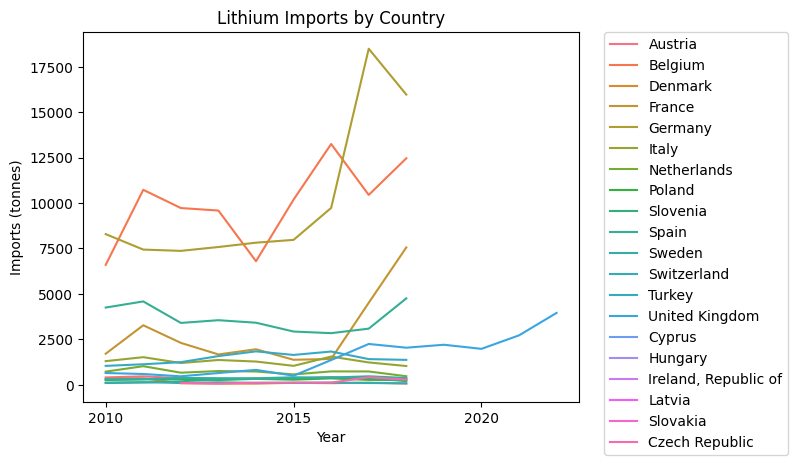

In [37]:
# Create a line plot
sns.lineplot(x="year", y="quantity", hue="country_trans", data=grouped_data)

plt.title("Lithium Imports by Country")
plt.xlabel("Year")
plt.ylabel("Imports (tonnes)")
plt.legend(title="Country")
# Place legend outside the chart on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Set x-axis ticks to every 5th year
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()